<a href="https://colab.research.google.com/github/haruhash/fruit-classification/blob/main/mangograde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

00 : Extra

01 : Class 1

02 : Class 2

03 : Class 3

In [ ]:
!pip install -q --pre pytorch-ignite==0.5.0.dev20230325
!pip install -q fastbook==0.0.29
!pip install --upgrade -q mxnet==1.9.1
!pip install -q autogluon==0.7.0
!pip install -q pythainlp==3.1.1
!pip install -q transformers==4.27.3
exit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!rm -r fruit-classification
!git clone https://github.com/haruhash/fruit-classification.git
!rm -r fruit-classification/valid_mini
!mkdir fruit-classification/valid_mini
import glob
import shutil
import os
valid_folders = glob.glob('fruit-classification/Mango/Test/*')
valid_fnames=[]
for folder in valid_folders:
  valid_fnames += glob.glob(f'{folder}/*')[:3]
for i in range(5):
  os.mkdir(f'fruit-classification/valid_mini/{str(i).zfill(2)}')
for fname in valid_fnames:
  shutil.copyfile(fname, f'fruit-classification/valid_mini/{fname.split("/")[-2]}/{fname.split("/")[-1]}')

rm: cannot remove 'fruit-classification': No such file or directory
Cloning into 'fruit-classification'...
remote: Enumerating objects: 96130, done.
remote: Counting objects: 100% (5387/5387), done.
remote: Compressing objects: 100% (5315/5315), done.
remote: Total 96130 (delta 75), reused 5371 (delta 66), pack-reused 90743
Receiving objects: 100% (96130/96130), 898.38 MiB | 39.23 MiB/s, done.
Resolving deltas: 100% (76/76), done.
rm: cannot remove 'fruit-classification/valid_mini': No such file or directory


In [ ]:
from fastbook import *

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(train_name="Training", valid_name = 'Test'),
    get_y = parent_label,
    batch_tfms = aug_transforms(size = 224),
    item_tfms = Resize(244)
    )
dls = dblock.dataloaders('fruit-classification/Mango/', bs = 10)

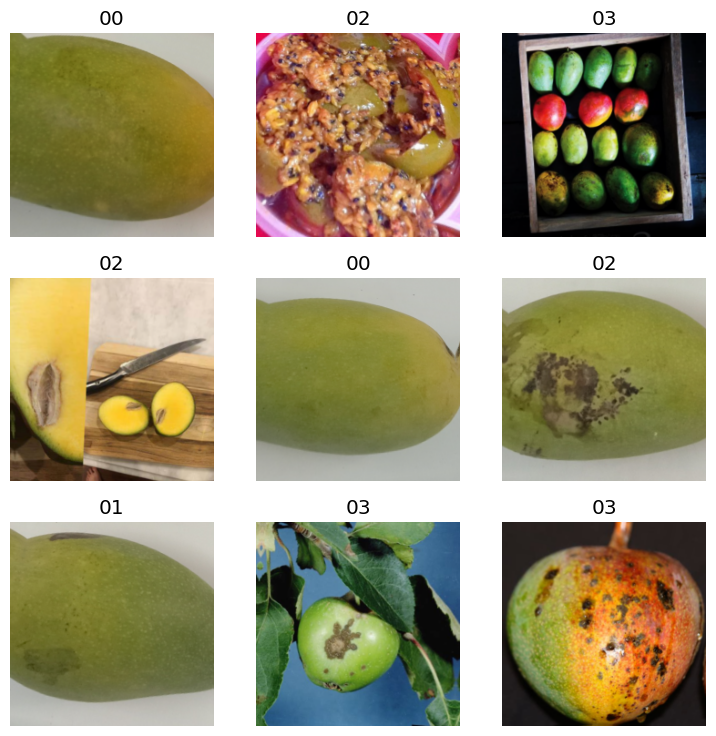

In [ ]:
dls.train.show_batch(max_n = 9, nrows = 3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

  0%|          | 0.00/97.8M [00:00<?, ?B/s]

(0.0015848932787775993, 0.00015848931798245758)

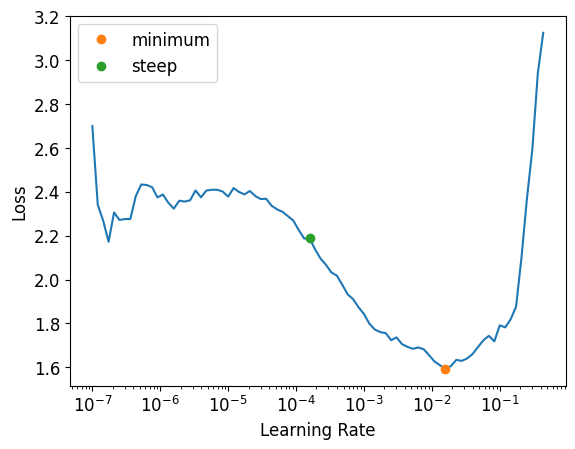

In [ ]:
learn = cnn_learner(dls, resnet50, metrics = accuracy)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
lr_min, lr_steep

In [ ]:
learn.fine_tune(epochs = 2, freeze_epochs = 1, base_lr = 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.288404,1.605886,0.658228,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.814154,1.843803,0.582278,00:11
1,0.628917,1.530632,0.607595,00:11


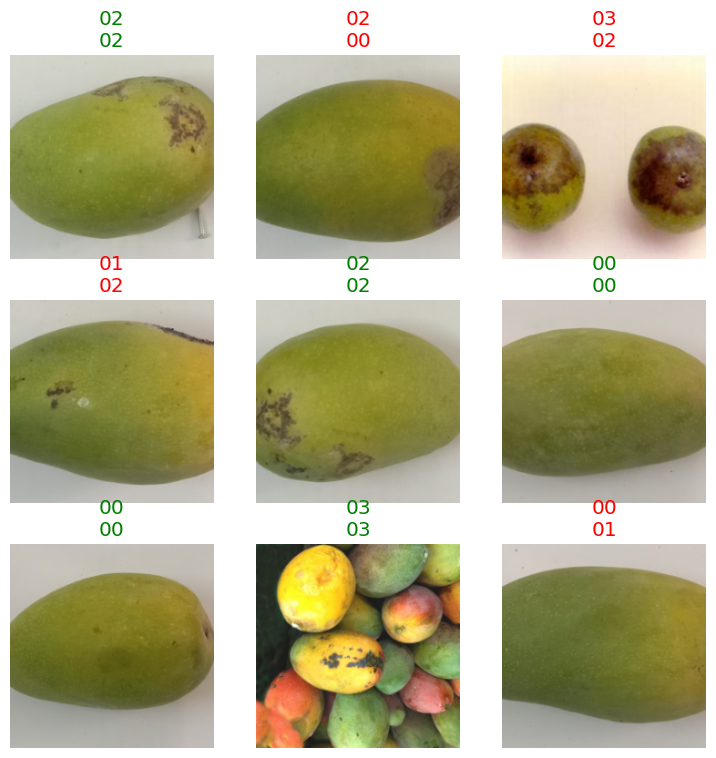

In [ ]:
learn.show_results()

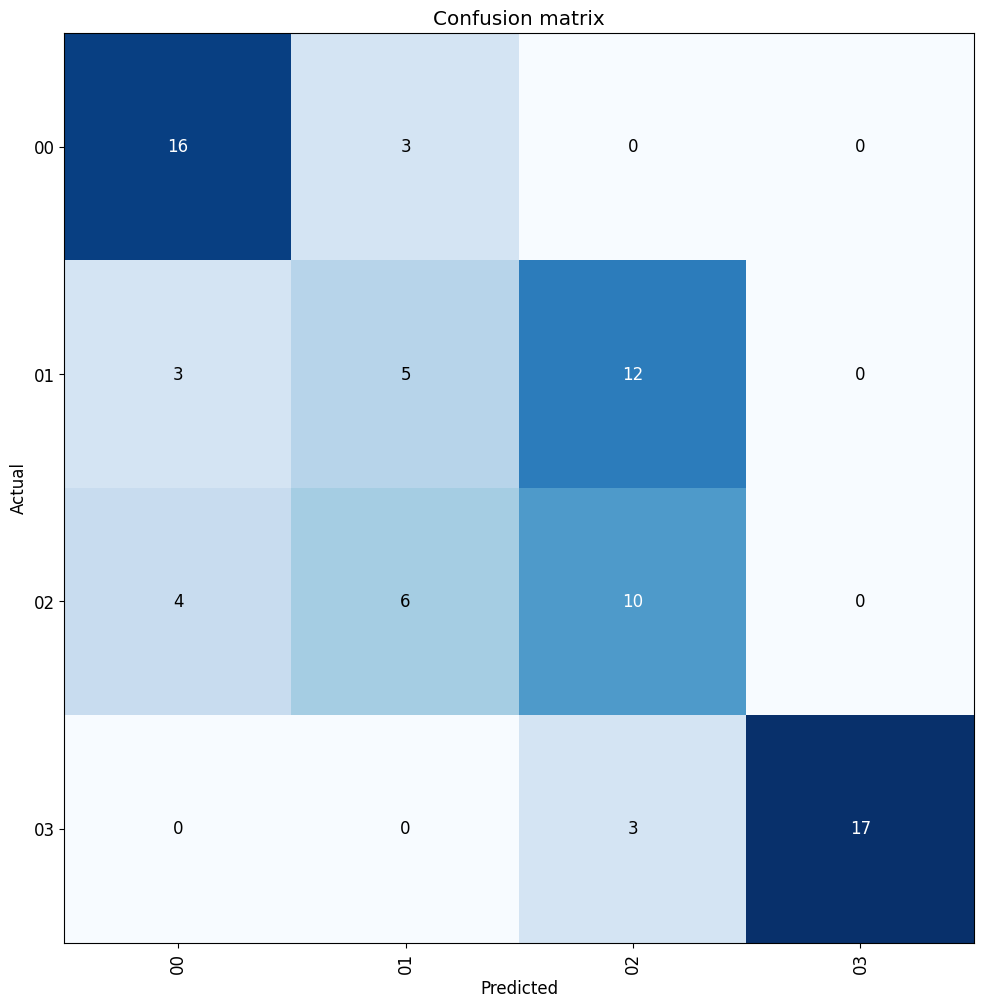

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (10, 10))

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

          00       0.84      0.84      0.84        19
          01       0.58      0.55      0.56        20
          02       0.62      0.75      0.68        20
          03       1.00      0.85      0.92        20

    accuracy                           0.75        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.76      0.75      0.75        79



In [ ]:
learn.export('mangograde.pkl')
path = Path()
path.ls(file_exts='.pkl')